# Importing libraries - will import other libraries later as we'll need them

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# A peek into our dataset

In [2]:
df=pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.isnull().sum()
#it doesnt seem that we have missing data yet

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [4]:
#lets confirm if we have missing data
for cols in df.columns:
    print(cols,":",sum(df[cols]=='?'))
    

print("-----------------------------------------")


for cols in df.columns:
    print(cols,":",sum(df[cols]=='-'))
    

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
Target : 0
-----------------------------------------
age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
Target : 0


###### lets take a look at every column and its datatype
we will drop **duration column (duration of a call)** because at the end of the call y is obviously known i.e we already know the outcome of the call. Thus, this input will be included only for EDA purposes and not for prediction.

In [5]:
df.shape

(45211, 17)

In [6]:
df.info()
#so we have 17 columns with 45211 records

#age - is numeric datatype-integer
#job(types of job) - is categorical datatype-object, which we will convert to categorical datatype
#marital(marital status) - is categorical datatype-object, which we will convert to categorical datatype
#education(type of education) - is categorical datatype-object, which we will convert to categorical datatype
#default(has credit in default?yes/no) - is categorical datatype-object, which we will convert to categorical datatype
#balance(avg yearly balance) - is numeric datatype-integer
#housing(has house loan?yes/no) - is categorical datatype-object, which we will convert to categorical datatype
#loan(has personal loan?yes/no) - is categorical datatype-object, which we will convert to categorical datatype
#contact(communication type) - is categorical datatype-object, which we will convert to categorical datatype
#day(last contact day of month) - is numeric datatype-integer
#month(last contact month,jan...dec) - is categorical datatype-object, which we will convert to categorical datatype
#duration(last contact duration in seconds) - is numeric datatype-integer
#campaign(no. of times contacted during this campaign) - is numeric datatype-integer
#pdays(number of days that passed by since the client was last contacted from previous campaign - is numeric datatype-integer
#previous(no. of times contacted before this campaign) - is numeric datatype-integer
#poutcome(outcome of previous marketing campaign) - is categorical datatype-object, which we will convert to category datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Understanding the numerical columns

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


=> Minimum value in pdays column is -1 which represents that the person was not contacted in the previous campaign, similarly minimum value in previous column is 0 which again means that the person was not contacted before the campaign. Later, we will look at these to columns in detail.<br>=> It seems that most of the values in pdays and previous columns are -1 and 0 respectively since all three statistics(median,25 percentile and 75 percentile) are -1 and 0 respectively. **Hence most of the people were not contacted in the past**.<br>=> Standard deviation of balance and pdays is very high, i.e there is a lot of variation among these two features.<br>=> Some accounts may have negative balance as well. Also balance feature seems to be very skewed as mean and median are very different.

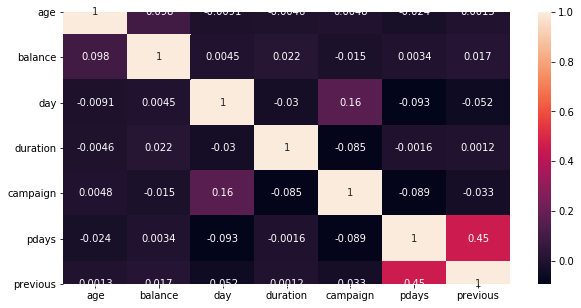

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

=>None of the numerical features have correlation.However, a small correlation can be seen between pdays and previous columns of about 0.45.<br>=>Hence columns are quite independent of each other

In [9]:
#checking the skewness of the features
print("We can see that balance,campaign,pdays and previous are highly skewed")
print("")
print(df.drop(columns=['duration'],axis=1).skew())

We can see that balance,campaign,pdays and previous are highly skewed

age          0.684818
balance      8.360308
day          0.093079
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64


# Analyzing the outliers

### Age

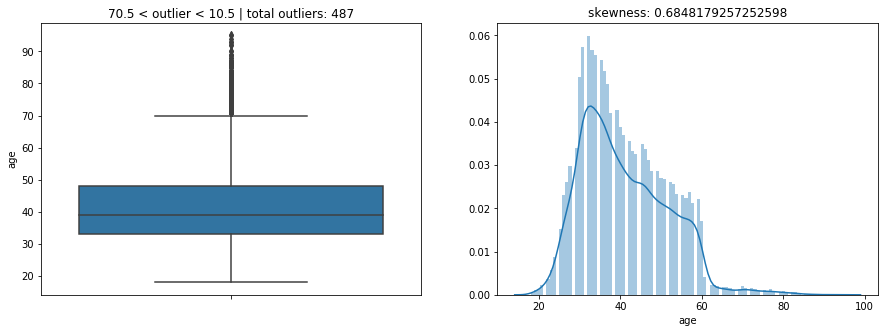

In [10]:
Q1 = np.percentile(a=df['age'], q=25)
Q3 = np.percentile(a=df['age'], q=75)

IQR = Q3 - Q1
ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
total = len(df[(df['age']>ul) | (df['age']<ll)])

fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
sns.boxplot(y='age',data=df,ax=ax[0]).set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
sns.distplot(df['age'],bins=100,ax=ax[1]).set_title("skewness: "+str(df['age'].skew()))

plt.show()

### Balance

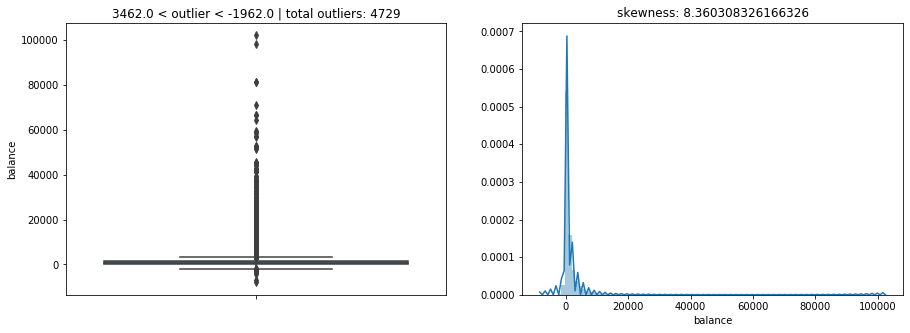

In [11]:
Q1 = np.percentile(a=df['balance'], q=25)
Q3 = np.percentile(a=df['balance'], q=75)

IQR = Q3 - Q1
ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
total = len(df[(df['balance']>ul) | (df['balance']<ll)])

fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
sns.boxplot(y='balance',data=df,ax=ax[0]).set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
sns.distplot(df['balance'],bins=100,ax=ax[1]).set_title("skewness: "+str(df['balance'].skew()))

plt.show()

### Campaign

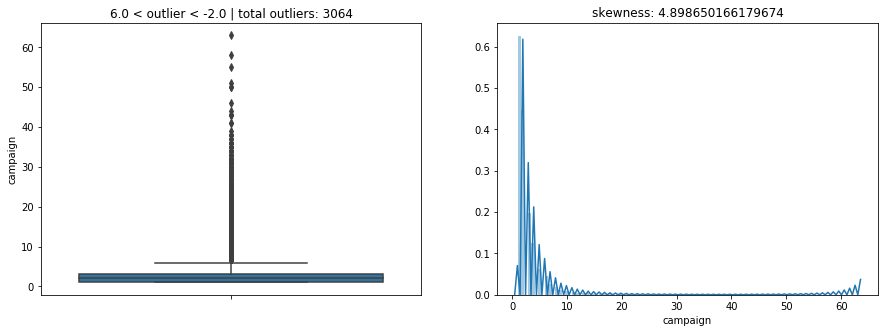

In [12]:
Q1 = np.percentile(a=df['campaign'], q=25)
Q3 = np.percentile(a=df['campaign'], q=75)

IQR = Q3 - Q1
ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
total = len(df[(df['campaign']>ul) | (df['campaign']<ll)])

fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
sns.boxplot(y='campaign',data=df,ax=ax[0]).set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
sns.distplot(df['campaign'],bins=100,ax=ax[1]).set_title("skewness: "+str(df['campaign'].skew()))

plt.show()

### pdays

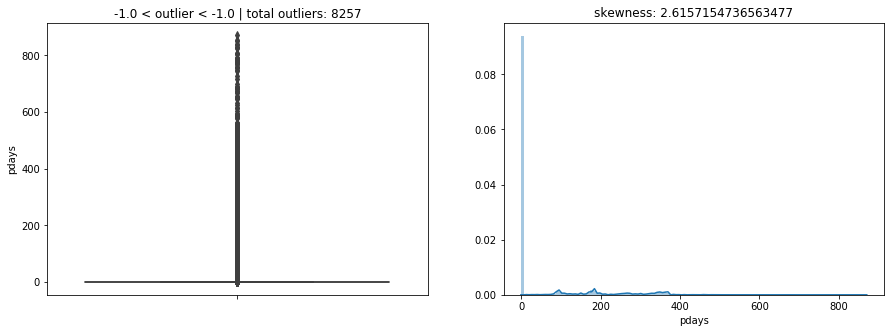

In [13]:
Q1 = np.percentile(a=df['pdays'], q=25)
Q3 = np.percentile(a=df['pdays'], q=75)

IQR = Q3 - Q1
ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
total = len(df[(df['pdays']>ul) | (df['pdays']<ll)])

fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
sns.boxplot(y='pdays',data=df,ax=ax[0]).set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
sns.distplot(df['pdays'],bins=100,ax=ax[1]).set_title("skewness: "+str(df['pdays'].skew()))

plt.show()

### previous

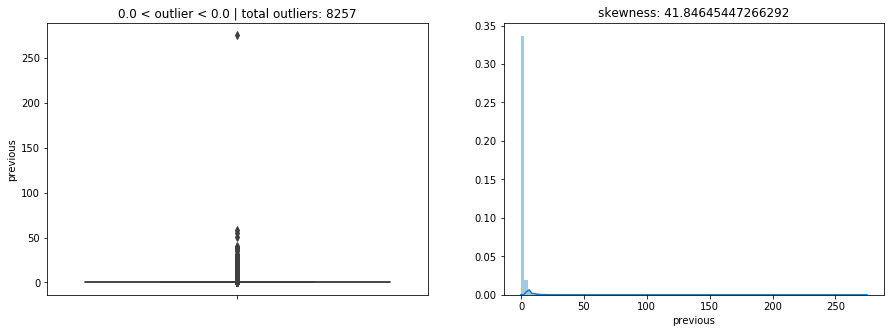

In [14]:
Q1 = np.percentile(a=df['previous'], q=25)
Q3 = np.percentile(a=df['previous'], q=75)

IQR = Q3 - Q1
ul = Q3+(1.5*IQR) 
ll = Q1-(1.5*IQR)
total = len(df[(df['previous']>ul) | (df['previous']<ll)])

fig, ax =plt.subplots(nrows=1,ncols=2,figsize=(15, 5))
sns.boxplot(y='previous',data=df,ax=ax[0]).set_title(str(ul)+' < outlier < '+str(ll)+' | total outliers: '+str(total))
sns.distplot(df['previous'],bins=100,ax=ax[1]).set_title("skewness: "+str(df['previous'].skew()))

plt.show()

**Looking at "previous" - (no. of times contacted before this campaign) and "pdays" - (no. of days passed by since last contacted from previous campaign) feature in detail**.<br>-1 in "pdays" means "not contacted in last campaign" and hence correspondingly all the people with -1's in "pdays" have 0's in "previous" i.e 0 times contacted before this campaign.... and vica versa only people that have 0's in "previous" are those who have -1 in "pdays" column.<br>CHECK BELOW:

In [15]:
print("min and max previous values of all people with pdays=-1(i.e not contacted in previous campaign)")
print("min: "+str(df[df['pdays']==-1]['previous'].min()))
print("max: "+str(df[df['pdays']==-1]['previous'].max()))

print("")

print("min and max pdays values of all people with previous=0(i.e not contacted in previous campaign)")
print("min: "+str(df[df['previous']==0]['pdays'].min()))
print("max: "+str(df[df['previous']==0]['pdays'].max()))

min and max previous values of all people with pdays=-1(i.e not contacted in previous campaign)
min: 0
max: 0

min and max pdays values of all people with previous=0(i.e not contacted in previous campaign)
min: -1
max: -1


### Looking at the outliers of both the features  above:
Any person with pdays > -1 and < -1 (in other words any person with pdays != -1) is considered as an outlier. Similarly, any person with previous!=0 is considered as an outlier. As we have seen people with pdays = -1 and previous = 0 were not contacted before. Therefore, both previous and pdays columns have 8257 outliers i.e out of 45211 total people only 8257 were contacted in previous campaign.

In [16]:
print("Therefore, about "+str(round((1-(8257/45211))*100,ndigits=2))+"% of people were not contacted previously and those who were contacted("+str(round(100-(1-(8257/45211))*100,ndigits=2))+"%) are considered as outliers")

Therefore, about 81.74% of people were not contacted previously and those who were contacted(18.26%) are considered as outliers


Hence if we remove or replace outliers with median/mode we will end up with only those people who were not contacted before, thereby completely losing information on people who were contacted in the previous campaigns(no matter how much less that information is).<br>Hence the cause of outliers in these features is not because of any anomaly or wrong data input but instead because of the fact that 80% of the people were not contacted in the past.<br>**Hence the outliers here are legitimate observations i.e they are genuine.**

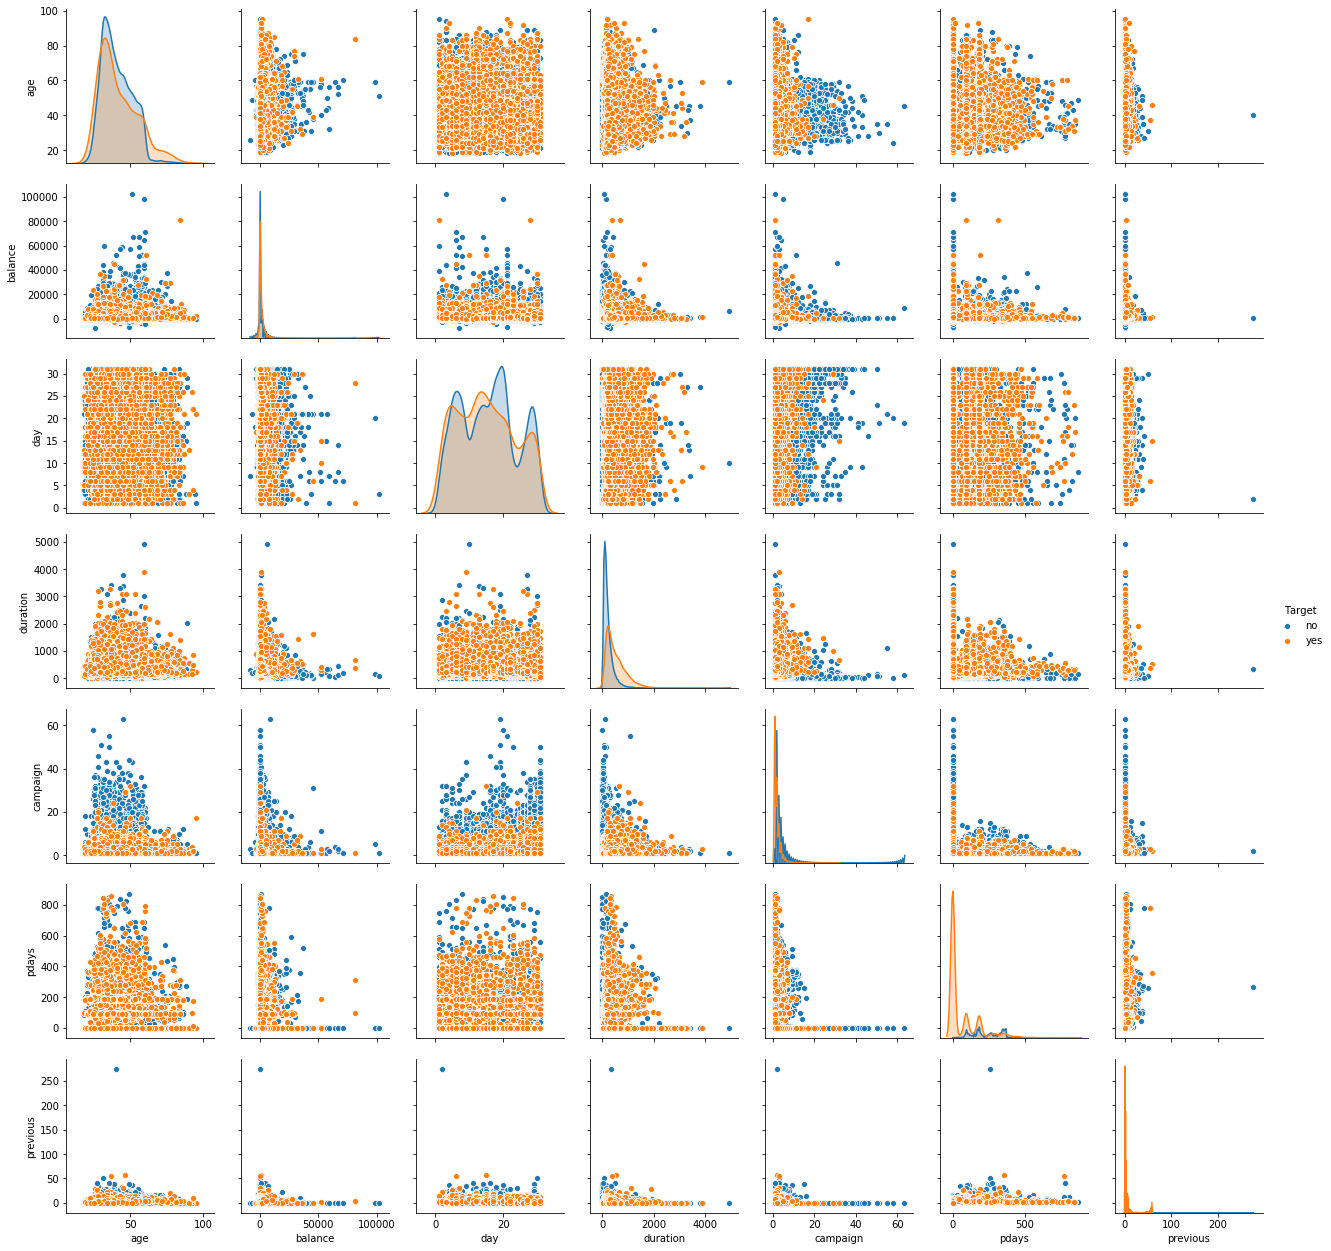

In [17]:
sns.pairplot(df,hue="Target")

we can also incur from the scatter plots that if we do multivariate analysis of the outliers there are just a few number of datapoints that are at the extremes (i.e completely away from the cloud). **Hence we can certainly say that removing/replacing outliers on the basis of univariate analysis will not be ideal in this situation. Therefore outliers in individual columns are indeed a natural part of the dataset and we shall not remove/replace them.**
### Instead, to reduce the affect of very extreme outliers we will treat them with Quantile-based Flooring and Capping. In this technique, we will do the flooring (5th percentile) for the lower values and capping (95th percentile) for the higher values. We will replace values below 5 percentile with the value at the 5 percentile cutoff and values above 95 percentile with the value at the 95 percentile cut off.

In [18]:
features_to_cap=['pdays','previous','age','balance','campaign']

for feat in features_to_cap:
    print("##### "+feat+" #####")
    print("lower quartile: "+str(df[feat].quantile(0.05)))
    print("upper quartile: "+str(df[feat].quantile(0.95)))
    print("total number of datapoints to be capped and floored: "+str(len(df[(df[feat]>df[feat].quantile(0.95)) | (df[feat]<df[feat].quantile(0.05))])))

    df[feat][df[feat]>df[feat].quantile(0.95)] = df[feat].quantile(0.95)
    df[feat][df[feat]<df[feat].quantile(0.05)] = df[feat].quantile(0.05)

    print("after capping and flooring extreme 5% tails:")
    print(len(df[(df[feat]>df[feat].quantile(0.95)) | (df[feat]<df[feat].quantile(0.05))]))
    print("***************************************************************************************************************")

##### pdays #####
lower quartile: -1.0
upper quartile: 317.0
total number of datapoints to be capped and floored: 2255
after capping and flooring extreme 5% tails:
0
***************************************************************************************************************
##### previous #####
lower quartile: 0.0
upper quartile: 3.0
total number of datapoints to be capped and floored: 2237
after capping and flooring extreme 5% tails:
0
***************************************************************************************************************
##### age #####
lower quartile: 27.0
upper quartile: 59.0
total number of datapoints to be capped and floored: 3925
after capping and flooring extreme 5% tails:
0
***************************************************************************************************************
##### balance #####
lower quartile: -172.0
upper quartile: 5768.0
total number of datapoints to be capped and floored: 4519
after capping and flooring extreme 5% tails:


# Some EDA on categorical features (understanding categorical features)

no     39922
yes     5289
Name: Target, dtype: int64
no     0.883015
yes    0.116985
Name: Target, dtype: float64
The classes are highly imbalanced - Only 11.7%(5289) of people subscribed to the bank term deposit.


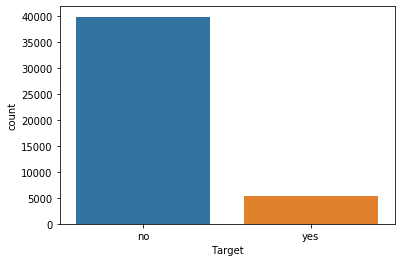

In [19]:
print(df['Target'].value_counts())
print(df['Target'].value_counts(normalize=True))
sns.countplot(x='Target',data=df)
print("The classes are highly imbalanced - Only 11.7%(5289) of people subscribed to the bank term deposit.")

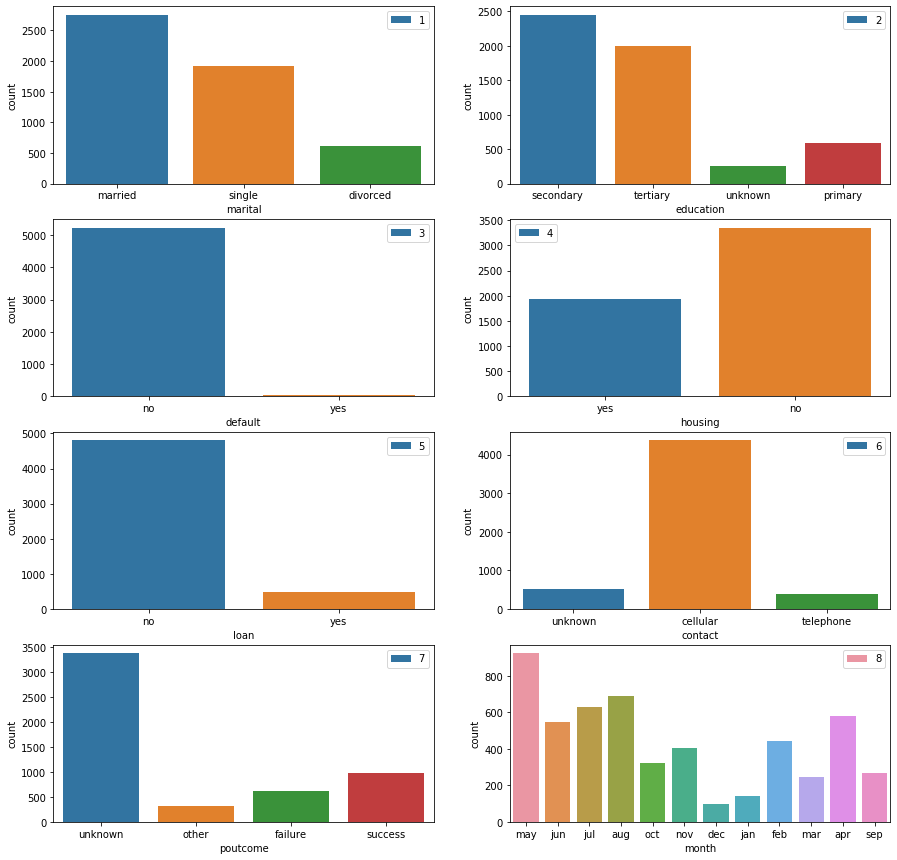

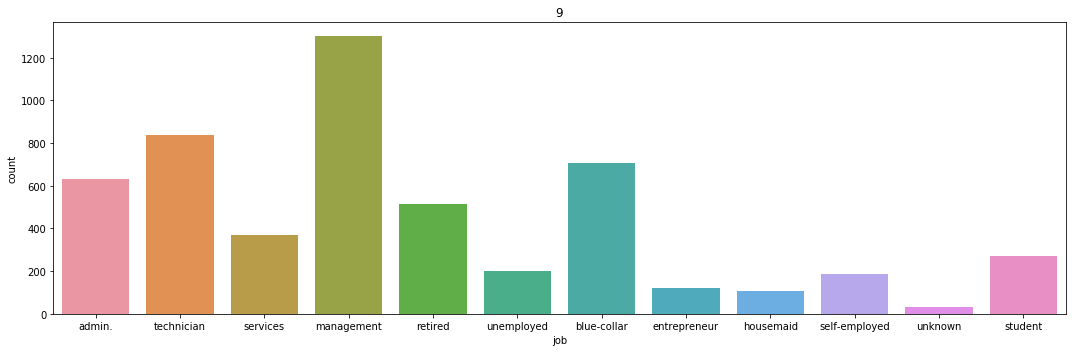

In [20]:
d = df[df["Target"]=="yes"]

fig, ax =plt.subplots(nrows=4,ncols=2,figsize=(15, 15))
sns.countplot(x="marital",data=d,ax=ax[0][0])
sns.countplot(x="education",data=d,ax=ax[0][1])
sns.countplot(x="default",data=d,ax=ax[1][0])
sns.countplot(x="housing",data=d,ax=ax[1][1])
sns.countplot(x="loan",data=d,ax=ax[2][0])
sns.countplot(x="contact",data=d,ax=ax[2][1])
sns.countplot(x="poutcome",data=d,ax=ax[3][0])
sns.countplot(x="month",data=d,ax=ax[3][1])

ax[0][0].legend(labels="1")
ax[0][1].legend(labels="2")
ax[1][0].legend(labels="3")
ax[1][1].legend(labels="4")
ax[2][0].legend(labels="5")
ax[2][1].legend(labels="6")
ax[3][0].legend(labels="7")
ax[3][1].legend(labels="8")


fig2, ax2 =plt.subplots(nrows=1,ncols=1,figsize=(15, 5))
sns.countplot(x="job",data=d,ax=ax2)
ax2.set_title("9")

fig.show()
fig2.show()
plt.tight_layout()

**Figure wise analysis:**<br>
fig1: of all the people who subscribed to the bank term deposit, mostly are married.<br>
fig2: mostly people who subscribed have secondary education.<br>
fig3: most people who subscribed do not have a default credit with the bank.<br>
fig4: of all the people who subscribed, about 1900 of them have a housing loan with the bank.<br>
fig5: of all the people who subscribed, mostly none of them have personal loan with the bank.<br>
fig6: of all the people who subscribed, most of them were contacted via cellular.<br>
fig7: of all the people who subscribed, about 1000 of them had subscribed in the previous campaign also.<br>
fig8: of all the people who subscribed, most of them were last contacted in may for THIS campaign.<br>
fig9: of all the people who subscribed, most of them have career in management, followed by technicians and then blue-collors.

### we can see a lot of categorical features have "unknown" values i.e missing data. We will now convert each categorical columns to datatype category and take a deeper look at the labels in each categorical feature

In [21]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print("##### "+feature+" #####")
        print(df[feature].value_counts())
        print("--------------------------------------------------------")


##### job #####
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------------------
##### marital #####
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------------------------------------------
##### education #####
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
--------------------------------------------------------
##### default #####
no     44396
yes      815
Name: default, dtype: int64
--------------------------------------------------------
##### housing #####
yes    25130
no     20081
Name: housing, dtype: int64
--------------------------------------------------------
##### loan #####
no     37967
yes

### We can see that some of these categorical features have missing data represented by "unknown"
### Lets see how we will treat these categorical features and fix "unknown" values in each of these features

**job feature**<br>
Ideally a job feature can act as ordinal but here we have certain labels in the feature which cannot be ranked confidently. eg: we can definitely say that bluecollor > housemaid or bluecollor > unemployed etc. etc. but there are certain jobs which we cannot confidently rank. eg: we cannot say that selfemployed > entrepreneur. It may or may not be.<br>Now, we can encode this feature by one-hot encoding but it will increase the feature set since there are 11 unique jobs(high cardinality).<br>Therefore, instead of label encoding or one-hot encoding this feature we will **frequency encode** them i.e **we can replace each label with its frequency of occurrence**.<br>Coming to "unknown" label, since there are 288 "unknown" labels out of 45211, therefore we will simply replace "unknown" with the mode of the job feature.

**martital status feature**<br>
This is a simple nominal feature which we will convert by one-hot encoding.

**education feature**<br>
Education is an ordinal feature which we will label encode to represent them as ranks. Also, there are quite some datapoints which are labeled as "unknown", hence we will treat "unknown" as another category in this feature but we will label encode it by -1 for our models to identify them as unknown and give them a lower weight.

**default(credit in default?) feature**<br>
Again, a simple binary(yes/no) category. Hence we will one-hot encode this feature.

**housing(has housing loan?) feature**<br>
A simple binary(yes/no) category. Hence we will one-hot encode this feature.

**loan(has personal loan?) feature**<br>
A simple binary(yes/no) category. Hence we will one-hot encode this feature.

**contact(communication type) feature**<br>
Simple nominal feature which we will convert by one-hot encoding. Again there are a lot of "unknown" labels hence we will treat "unknown" as a seperate label.

**month(last contact month) feature**<br>
We will treat this as an ordinal feature hence we will label encode it from 1 to 12.

**poutcome(outcome of previous marketing campaign) feature**<br>
We will treat this as an ordinal feature hence we will label encode it to represent ranks. It has a lot of "unknown" labels hence we will treat "unknown" as a seperate category labeling it with -1 for or models to identify them as unknown and give them a lower weight.<br>Other than "failure" "success" and "unknown" we also have **"other" category**. We will **rank "other" between success and failure since** "other" is not a complete success and not a complete failure.

**target(subscribe for bank term deposit or not) feature**<br>
This is our target variable hence we will label encode it with 1 or 0.

In [22]:
#As we have discussed, there are vey less "unknown" values in job feature hence we will first replace all "unknown" with
#mode of this feature and then encode it
df['job'][df['job']=="unknown"] = df['job'].mode()[0]


#converting datatypes from object to category before encoding
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = df[feature].astype('category')


#frequency encoding job feature i.e replacing each label by its frequency
frequency = df['job'].value_counts().to_dict()
df['job'] = df['job'].map(frequency)
df['job'] = df['job'].astype('int64')


#ordinal categorical columns that we are label encoding
ordinal_labelencoding = {
                "education":{"primary":1, "secondary":2, "tertiary":3 ,"unknown":-1},
                "month": {"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12},
                "poutcome":{"success":3, "other":2, "failure":1 ,"unknown":-1},
                "Target":{"no":0, "yes":1}
                    }
df=df.replace(ordinal_labelencoding)



#categorical columns that we are one-hot encoding
onehot_encoding=["marital","default","housing","loan","contact"]
df=pd.get_dummies(df, columns=onehot_encoding, drop_first=True)


df.head(10)

,age,job,education,balance,day,month,duration,campaign,pdays,previous,poutcome,Target,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,9458,3,2143,5,5,261,1,-1,0,-1,0,1,0,0,1,0,0,1
1,44,7597,2,29,5,5,151,1,-1,0,-1,0,0,1,0,1,0,0,1
2,33,1487,2,2,5,5,76,1,-1,0,-1,0,1,0,0,1,1,0,1
3,47,10020,-1,1506,5,5,92,1,-1,0,-1,0,1,0,0,1,0,0,1
4,33,10020,-1,1,5,5,198,1,-1,0,-1,0,0,1,0,0,0,0,1
5,35,9458,3,231,5,5,139,1,-1,0,-1,0,1,0,0,1,0,0,1
6,28,9458,3,447,5,5,217,1,-1,0,-1,0,0,1,0,1,1,0,1
7,42,1487,3,2,5,5,380,1,-1,0,-1,0,0,0,1,1,0,0,1
8,58,2264,1,121,5,5,50,1,-1,0,-1,0,1,0,0,1,0,0,1
9,43,7597,2,593,5,5,55,1,-1,0,-1,0,0,1,0,1,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age                  45211 non-null int64
job                  45211 non-null int64
education            45211 non-null int64
balance              45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null int64
Target               45211 non-null int64
marital_married      45211 non-null uint8
marital_single       45211 non-null uint8
default_yes          45211 non-null uint8
housing_yes          45211 non-null uint8
loan_yes             45211 non-null uint8
contact_telephone    45211 non-null uint8
contact_unknown      45211 non-null uint8
dtypes: int64(12), uint8(7)
memory usage: 4.4 MB


# Splitting and scaling data 

In [24]:
features = df.drop(['duration','Target'],axis=1) #dropping duration column (explained at the top)
target = df['Target']

our_cols = features.columns
features.head()

,age,job,education,balance,day,month,campaign,pdays,previous,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,9458,3,2143,5,5,1,-1,0,-1,1,0,0,1,0,0,1
1,44,7597,2,29,5,5,1,-1,0,-1,0,1,0,1,0,0,1
2,33,1487,2,2,5,5,1,-1,0,-1,1,0,0,1,1,0,1
3,47,10020,-1,1506,5,5,1,-1,0,-1,1,0,0,1,0,0,1
4,33,10020,-1,1,5,5,1,-1,0,-1,0,1,0,0,0,0,1


In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

features_scaled = pd.DataFrame(MinMaxScaler().fit_transform(features))
features_scaled.columns = our_cols

In [26]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=1000)
print(x_train.shape)
print(x_test.shape)
x_train.head()

(31647, 17)
(13564, 17)


,age,job,education,balance,day,month,campaign,pdays,previous,poutcome,marital_married,marital_single,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown
29302,0.00000,0.070579,1.00,0.106061,0.033333,0.090909,0.857143,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
24460,0.25000,0.354107,0.75,0.403199,0.533333,0.909091,0.285714,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11128,0.28125,1.000000,0.50,0.316330,0.566667,0.454545,0.142857,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8475,0.37500,0.040189,0.75,0.074411,0.066667,0.454545,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5961,0.03125,1.000000,0.75,0.086027,0.833333,0.363636,0.142857,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [27]:
y_train.value_counts(normalize=True)

0    0.883464
1    0.116536
Name: Target, dtype: float64

In [28]:
y_test.value_counts(normalize=True)

0    0.881967
1    0.118033
Name: Target, dtype: float64

**Yet again, we can see above that our dataset is highly imbalanced. People who subscribed to the bank term deposit are clearly a minority(11%)**

# Training a few standard models

we are creating these few base models and then we'll see how we can improve the performance with ensemble methods<br>
**Note** that some of these base models are not suitable for bagging and boosting hence we will see in detail why some of these models do not make much improvement and are not preferred for bagging and boosting

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

lr = LogisticRegression()
lr.fit(x_train, y_train)

knn = KNeighborsClassifier(n_neighbors= 10 , weights = 'distance' )
knn.fit(x_train, y_train)

svc = SVC()
svc.fit(x_train, y_train)

dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
dt.fit(x_train, y_train)

gnb = GaussianNB()
gnb.fit(x_train, y_train)

word='done'
word

'done'

In [30]:
print("**** logistic reg ****")
print("accuracy training: "+str(lr.score(x_train, y_train)))
print("accuracy testing: "+str(lr.score(x_test, y_test)))
print("")

print("**** knn ****")
print("accuracy training: "+str(knn.score(x_train, y_train)))
print("accuracy testing: "+str(knn.score(x_test, y_test)))
print("")

print("**** svc ****")
print("accuracy training: "+str(svc.score(x_train, y_train)))
print("accuracy testing: "+str(svc.score(x_test, y_test)))
print("")

print("**** decision trees ****")
print("accuracy training: "+str(dt.score(x_train, y_train)))
print("accuracy testing: "+str(dt.score(x_test, y_test)))
print("")

print("**** naive bayes ****")
print("accuracy training: "+str(gnb.score(x_train, y_train)))
print("accuracy testing: "+str(gnb.score(x_test, y_test)))
print("")

**** logistic reg ****
accuracy training: 0.8900369703289411
accuracy testing: 0.8871276909466234

**** knn ****
accuracy training: 0.9999684014282555
accuracy testing: 0.8855057505160719

**** svc ****
accuracy training: 0.8918064903466363
accuracy testing: 0.8902241226776763

**** decision trees ****
accuracy training: 0.9999684014282555
accuracy testing: 0.8316868180477736

**** naive bayes ****
accuracy training: 0.7898063007552059
accuracy testing: 0.7894426422884105



**roc curves of probabilistic models**

In [31]:
yprob_lr = lr.predict_proba(x_test)[:,1]
yprob_knn = knn.predict_proba(x_test)[:,1]
yprob_gnb = gnb.predict_proba(x_test)[:,1]

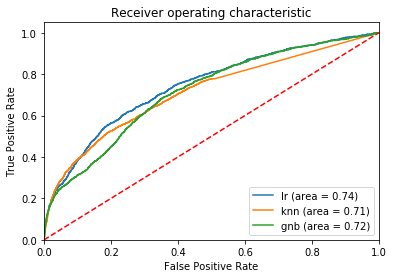

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

auc_lr = roc_auc_score(y_test, yprob_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, yprob_lr)

auc_knn = roc_auc_score(y_test, yprob_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, yprob_knn)

auc_gnb = roc_auc_score(y_test, yprob_gnb)
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, yprob_gnb)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='lr (area = %0.2f)' % auc_lr)
plt.plot(fpr_knn, tpr_knn, label='knn (area = %0.2f)' % auc_knn)
plt.plot(fpr_gnb, tpr_gnb, label='gnb (area = %0.2f)' % auc_gnb)
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**other performance metrices**

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

ypred_lr = lr.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_lr,labels=[1,0])
lr_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
lr_cr = classification_report(y_true=y_test, y_pred=ypred_lr)

ypred_knn = knn.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_knn,labels=[1,0])
knn_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
knn_cr = classification_report(y_true=y_test, y_pred=ypred_knn)

ypred_svc = svc.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_svc,labels=[1,0])
svc_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
svc_cr = classification_report(y_true=y_test, y_pred=ypred_svc)

ypred_dt = dt.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_dt,labels=[1,0])
dt_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
dt_cr = classification_report(y_true=y_test, y_pred=ypred_dt)

ypred_gnb = gnb.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_gnb,labels=[1,0])
gnb_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
gnb_cr = classification_report(y_true=y_test, y_pred=ypred_gnb)


print("-------lr-------")
print(lr_cm)
print("")
print(lr_cr)
print("")
print("")

print("-------knn-------")
print(knn_cm)
print("")
print(knn_cr)
print("")
print("")

print("-------svc-------")
print(svc_cm)
print("")
print(svc_cr)
print("")
print("")

print("-------dt-------")
print(dt_cm)
print("")
print(dt_cr)
print("")
print("")

print("-------gnb-------")
print(gnb_cm)
print("")
print(gnb_cr)
print("")
print("")




-------lr-------
                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       200                      1401
Truth(didnt subscribe)                  130                     11833

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11963
           1       0.61      0.12      0.21      1601

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.57     13564
weighted avg       0.86      0.89      0.85     13564



-------knn-------
                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       267                      1334
Truth(didnt subscribe)                  219                     11744

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11963
           1       0.55      0.17      0.26      1601

    accuracy                           0.89     13

Looking at the performances of the base models, the precision for the minority class is still better in logistic regression, knn, and svm as compared to decision trees and naive bayes but recall values of all the models are very low for the minority class<br>
# Bagging:

## bagging with logistic regression as the base model

In [34]:
from sklearn.ensemble import BaggingClassifier

bagging_lr = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=70, random_state=100)
bagging_lr = bagging_lr.fit(x_train, y_train)

print("training set: "+str(bagging_lr.score(x_train, y_train)))
print("testing set: "+str(bagging_lr.score(x_test, y_test)))

ypred_lr = bagging_lr.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_lr,labels=[1,0])
lr_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
lr_cr = classification_report(y_true=y_test, y_pred=ypred_lr)

print("")
print(lr_cm)
print(lr_cr)
print("")

training set: 0.8900369703289411
testing set: 0.8870539663815984

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       200                      1401
Truth(didnt subscribe)                  131                     11832
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11963
           1       0.60      0.12      0.21      1601

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.57     13564
weighted avg       0.86      0.89      0.85     13564




**Bagging the logistic model did not make any difference. This is because bagging aims at reducing the overfit and varience. Models such as Decision Trees usually benefit from bagging because they are prone to overfitting because these models are "unstable" i.e they have high varience because a small change in data results in a completely different tree.<br>However, this is not the case with logistic regression. Logistic regression are stable models. Hence bagging LR models by shuffling the rows with replacement wont make one model much different from another i.e all the LR models created in bagging are quite similar to each other thereby producing similar results**

## bagging with **knn** as the base model
Note that knn will be a "stable" model if k is of a high value because of the high probability of a datapoint having same set of neighbours after every shuffle with replacement hence producing same results.<br> Say, if k=1/k=3 and we modify/shuffle the dataset with replacement. The probabilty of having the same neighbours as before is low while on the other hand if k=10/k=20, then the probability of having the same neighbour as before is high.<br> Hence bagging with knn as the classifier could produce different and slightly better results if k is low i.e "unstable" models that are very different from each other.

In [35]:
bagging_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors= 1 , weights = 'distance' ), n_estimators=100, random_state=10000)
bagging_knn = bagging_knn.fit(x_train, y_train)

print("training set: "+str(bagging_knn.score(x_train, y_train)))
print("testing set: "+str(bagging_knn.score(x_test, y_test)))

ypred_knn = bagging_knn.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_knn,labels=[1,0])
knn_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
knn_cr = classification_report(y_true=y_test, y_pred=ypred_knn)

print("")
print(knn_cm)
print(knn_cr)
print("")

training set: 0.9996840142825544
testing set: 0.8368475375995281

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       421                      1180
Truth(didnt subscribe)                 1033                     10930
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     11963
           1       0.29      0.26      0.28      1601

    accuracy                           0.84     13564
   macro avg       0.60      0.59      0.59     13564
weighted avg       0.83      0.84      0.83     13564




**However, in our case classes are highly imbalanced (11% belongs to class 1 and and 89% belongs to class 2) and therefore it is unlikely to produce different models everytime we modify the dataset in bagging. Moreover, the knn is very computationally expensive with a large dataset like this(45211 records) as it has to calculate distance for every new datapoint that is to be classified with other datapoints. Therefore bagging with knn makes the whole process even more computationally expensive and time consuming. Hence bagged knn is not worth the trouble just for a slight improvement in the performance.... and clearly there is not much improvement in bagging of unstable knn models(k=1) from our base knn model with k=10.**

## bagging with svm as the base model

Again SVM's are pretty stable models(not much difference between models as we modify the data), hence we will apply bagging of "underfit" and "unstable" svm model with low gamma and low C

In [36]:
bagging_svm = BaggingClassifier(base_estimator=SVC(gamma=0.00001, C=10), n_estimators=100, random_state=10000)
bagging_svm = bagging_svm.fit(x_train, y_train)

print("training set: "+str(bagging_svm.score(x_train, y_train)))
print("testing set: "+str(bagging_svm.score(x_test, y_test)))

ypred_svm = bagging_svm.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_svm,labels=[1,0])
svm_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
svm_cr = classification_report(y_true=y_test, y_pred=ypred_svm)

print("")
print(svm_cm)
print(svm_cr)
print("")

training set: 0.8834644674060732
testing set: 0.8819669713948688

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                         0                      1601
Truth(didnt subscribe)                    0                     11963
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11963
           1       0.00      0.00      0.00      1601

    accuracy                           0.88     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.78      0.88      0.83     13564




**SVM models are slow to train, hence bagging with svm was even more complex in terms of time and computational efficiency. Also the performance of the bagged model further decreased from the base model**.

## bagging with naive bayes as the base model

In [37]:
bagging_gnb = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=100)
bagging_gnb = bagging_gnb.fit(x_train, y_train)

print("training set: "+str(bagging_gnb.score(x_train, y_train)))
print("testing set: "+str(bagging_gnb.score(x_test, y_test)))

ypred_gnb = bagging_gnb.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_gnb,labels=[1,0])
gnb_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
gnb_cr = classification_report(y_true=y_test, y_pred=ypred_gnb)

print("")
print(gnb_cm)
print(gnb_cr)
print("")

training set: 0.7903118779031187
testing set: 0.7901061633736362

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       613                       988
Truth(didnt subscribe)                 1859                     10104
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     11963
           1       0.25      0.38      0.30      1601

    accuracy                           0.79     13564
   macro avg       0.58      0.61      0.59     13564
weighted avg       0.83      0.79      0.81     13564




**Bagging with naive bayes didnt make much difference in the performance as compared to the base model of naive bayes. This is because like knn and logistic regression naive bayes is also a stable model(i.e have low varience) Therefore Bagged Naive Bayes also does not have much different performance from the base model.**

## bagging with DT as the base model
Here it will create full grown trees for every modified data

In [38]:
bagging_dt = BaggingClassifier(n_estimators=70, random_state=100)
bagging_dt = bagging_dt.fit(x_train, y_train)

print("training set: "+str(bagging_dt.score(x_train, y_train)))
print("testing set: "+str(bagging_dt.score(x_test, y_test)))

ypred_dt = bagging_dt.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_dt,labels=[1,0])
dt_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
dt_cr = classification_report(y_true=y_test, y_pred=ypred_dt)

print("")
print(dt_cm)
print(dt_cr)
print("")

training set: 0.9996208171390654
testing set: 0.8876437629017989

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       392                      1209
Truth(didnt subscribe)                  315                     11648
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11963
           1       0.55      0.24      0.34      1601

    accuracy                           0.89     13564
   macro avg       0.73      0.61      0.64     13564
weighted avg       0.86      0.89      0.87     13564




**clearly the bagged decision tree has shown much better performance than the base tree. The precision for the minority class has drastically improved from 0.30 to 0.55**

Now we will slightly prune the trees to a max depth of 15

In [39]:
bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = "entropy", max_depth=15, random_state = 100), n_estimators=70, random_state=100)
bagging_dt = bagging_dt.fit(x_train, y_train)

print("training set: "+str(bagging_dt.score(x_train, y_train)))
print("testing set: "+str(bagging_dt.score(x_test, y_test)))

ypred_dt = bagging_dt.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_dt,labels=[1,0])
dt_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
dt_cr = classification_report(y_true=y_test, y_pred=ypred_dt)

print("")
print(dt_cm)
print(dt_cr)
print("")

training set: 0.9437861408664329
testing set: 0.8905190209377765

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       401                      1200
Truth(didnt subscribe)                  285                     11678
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11963
           1       0.58      0.25      0.35      1601

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.65     13564
weighted avg       0.87      0.89      0.87     13564




**When we apply bagging with slightly pruned trees, we can further improve the performance of the model making it more general. We can also see a quite an improvement in the precision of both minority and majority class** 

Now we will use random trees and limit its depth to a maximum of 15

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 70, random_state=1,max_depth=15,max_features=5)
rfcl = rfcl.fit(x_train, y_train)

print("training set: "+str(rfcl.score(x_train, y_train)))
print("testing set: "+str(rfcl.score(x_test, y_test)))

ypred_rfcl = rfcl.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_rfcl,labels=[1,0])
rfcl_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
rfcl_cr = classification_report(y_true=y_test, y_pred=ypred_rfcl)

print("")
print(rfcl_cm)
print(rfcl_cr)
print("")

training set: 0.9437229437229437
testing set: 0.8915511648481274

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       320                      1281
Truth(didnt subscribe)                  190                     11773
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11963
           1       0.63      0.20      0.30      1601

    accuracy                           0.89     13564
   macro avg       0.76      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564




**Therefore we can see that on applying random trees(with a depth of 15 in each tree) we can further improve the precision from 0.58 to 0.62 for minority class. Other than that both the models 1)Random tress with depth 15 and 2) Bagged tree with depth 15 produce same results**

# Boosting:

=> Boosting can only be used with algorithms that support **weighted samples**. This is because the boosting algorithm is such that it gives weight to the missclassified points in the previous model. Hence **knn** can not be used as a base model for boosting.<br>
=> Also, **SVM** can be used with boosting if **probability=True**(adaboosting algorithm supports the calculation of class probabilities) but SVM in itself is a strong learner and the idea of boosting weak learners to make one sttrong learner is violated. Also, SVM are hard to train and thus boosting SVMs is computationaly expensive and complex.

## Adaboosting logistic regression as the base model

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada_lr = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=40, random_state=10000)
ada_lr = ada_lr.fit(x_train, y_train)

print("training set: "+str(ada_lr.score(x_train, y_train)))
print("testing set: "+str(ada_lr.score(x_test, y_test)))

ypred_ada_lr = ada_lr.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_ada_lr,labels=[1,0])
ada_lr_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
ada_lr_cr = classification_report(y_true=y_test, y_pred=ypred_ada_lr)

print("")
print(ada_lr_cm)
print(ada_lr_cr)
print("")

training set: 0.8839068474104971
testing set: 0.882114420524919

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                         7                      1594
Truth(didnt subscribe)                    5                     11958
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11963
           1       0.58      0.00      0.01      1601

    accuracy                           0.88     13564
   macro avg       0.73      0.50      0.47     13564
weighted avg       0.85      0.88      0.83     13564




**Adaboosting has completely overfit the model thereby producing even much worse performance. This is because logistic regression is a very strong learner in this case and boosting a strong learner completely overfits the ensemble model.<br>Also logistic regression lis a linear model and linear models are not suited for boosting because adding multiple linear models together will still be a linear model i.e both the models are linear in nature and hence there is not much diffrerence in predictive power of the ensembled model and the base model. Hence we would prefer a simple logistic base model because we can achieve the same result rather than a boosted logistic model where we go through a number of iterations**

## Adaboosting Naive Bayes as the base model

In [42]:
ada_gnb = AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=7, random_state=10000)
ada_gnb = ada_gnb.fit(x_train, y_train)

print("training set: "+str(ada_gnb.score(x_train, y_train)))
print("testing set: "+str(ada_gnb.score(x_test, y_test)))

ypred_ada_gnb = ada_gnb.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_ada_gnb,labels=[1,0])
ada_gnb_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
ada_gnb_cr = classification_report(y_true=y_test, y_pred=ypred_ada_gnb)

print("")
print(ada_gnb_cm)
print(ada_gnb_cr)
print("")

training set: 0.7898063007552059
testing set: 0.7894426422884105

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       612                       989
Truth(didnt subscribe)                 1867                     10096
              precision    recall  f1-score   support

           0       0.91      0.84      0.88     11963
           1       0.25      0.38      0.30      1601

    accuracy                           0.79     13564
   macro avg       0.58      0.61      0.59     13564
weighted avg       0.83      0.79      0.81     13564




**Again, boosting the naiave bayes classifier did not introduce much improvement than the base model for a simple reason that these are already stable models and iterating over them will result in overfitting.**

# Finally, after seeing the bagging and boosting affects across different models we conclude that decision trees work best with these two ensemble techniques. 
## We have already achieved very good performance by bagging a pruned decision tree and random forest with a good accuracy on the training set as well as the test set with much better recall and precision values for the minority class.
#### Lets see if boosting a tree can help in achieving better model than bagging:

Results from previously bagged tree and random forest model:

In [43]:
print('#####################################--Bagged Tree with max_depth=15--#####################################')
print("training set: "+str(bagging_dt.score(x_train, y_train)))
print("testing set: "+str(bagging_dt.score(x_test, y_test)))
print("")
print("")
print(dt_cm)
print("")
print(dt_cr)
print("")
print("")
print('#########################--Random forest with max_depth=15, randomly taking 5 features per estimator--#########################')
print("training set: "+str(rfcl.score(x_train, y_train)))
print("testing set: "+str(rfcl.score(x_test, y_test)))
print("")
print(rfcl_cm)
print("")
print(rfcl_cr)
print("")

#####################################--Bagged Tree with max_depth=15--#####################################
training set: 0.9437861408664329
testing set: 0.8905190209377765


                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       401                      1200
Truth(didnt subscribe)                  285                     11678

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11963
           1       0.58      0.25      0.35      1601

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.65     13564
weighted avg       0.87      0.89      0.87     13564



#########################--Random forest with max_depth=15, randomly taking 5 features per estimator--#########################
training set: 0.9437229437229437
testing set: 0.8915511648481274

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)    

## boosting a very simple tree

In [44]:
ada_dt = AdaBoostClassifier(n_estimators=7, random_state=1000)
ada_dt = ada_dt.fit(x_train, y_train)

print("training set: "+str(ada_dt.score(x_train, y_train)))
print("testing set: "+str(ada_dt.score(x_test, y_test)))

ypred_ada_dt = ada_dt.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_ada_dt,labels=[1,0])
ada_dt_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
ada_dt_cr = classification_report(y_true=y_test, y_pred=ypred_ada_dt)

print("")
print(ada_dt_cm)
print(ada_dt_cr)
print("")

training set: 0.8935760103643315
testing set: 0.8919197876732528

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       301                      1300
Truth(didnt subscribe)                  166                     11797
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11963
           1       0.64      0.19      0.29      1601

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.86     13564




## Boosting a pruned tree(pruned to a max depth of 15)

In [45]:
ada_dt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion = "entropy", max_depth=15, random_state = 100), n_estimators=3, random_state=1000)
ada_dt = ada_dt.fit(x_train, y_train)

print("training set: "+str(ada_dt.score(x_train, y_train)))
print("testing set: "+str(ada_dt.score(x_test, y_test)))

ypred_ada_dt = ada_dt.predict(x_test)
mat_test = confusion_matrix(y_test,ypred_ada_dt,labels=[1,0])
ada_dt_cm = pd.DataFrame(mat_test, index = [i for i in ["Truth(subscribed)","Truth(didnt subscribe)"]],
                  columns = [i for i in ["Predict(subscribed)","Predict(didnt subscribe)"]])
ada_dt_cr = classification_report(y_true=y_test, y_pred=ypred_ada_dt)

print("")
print(ada_dt_cm)
print(ada_dt_cr)
print("")

training set: 0.9692861882642905
testing set: 0.8538779121203185

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       417                      1184
Truth(didnt subscribe)                  798                     11165
              precision    recall  f1-score   support

           0       0.90      0.93      0.92     11963
           1       0.34      0.26      0.30      1601

    accuracy                           0.85     13564
   macro avg       0.62      0.60      0.61     13564
weighted avg       0.84      0.85      0.85     13564




**Clearly boosting tree does improve the performance from the base tree. But bagging and random forest is still better than the boosting model in this case. Bagging and random forest helped in achieving better precision for the minority class.<br>**

# Conclusion:
## We can either choose <br>1) Bagged decision tree(pruned to maxdepth=15) or <br> 2) Random forest(with pruned tree as base estimator-maxdepth=15) <br>to be an appropiate model for this dataset

In [46]:
print('#####################################--Bagged Tree with max_depth=15--#####################################')
print("training set: "+str(bagging_dt.score(x_train, y_train)))
print("testing set: "+str(bagging_dt.score(x_test, y_test)))
print("")
print("")
print(dt_cm)
print("")
print(dt_cr)
print("")
print("")
print('#########################--Random forest with max_depth=15, randomly taking 5 features per estimator--#########################')
print("training set: "+str(rfcl.score(x_train, y_train)))
print("testing set: "+str(rfcl.score(x_test, y_test)))
print("")
print(rfcl_cm)
print("")
print(rfcl_cr)
print("")

#####################################--Bagged Tree with max_depth=15--#####################################
training set: 0.9437861408664329
testing set: 0.8905190209377765


                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)                       401                      1200
Truth(didnt subscribe)                  285                     11678

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11963
           1       0.58      0.25      0.35      1601

    accuracy                           0.89     13564
   macro avg       0.75      0.61      0.65     13564
weighted avg       0.87      0.89      0.87     13564



#########################--Random forest with max_depth=15, randomly taking 5 features per estimator--#########################
training set: 0.9437229437229437
testing set: 0.8915511648481274

                        Predict(subscribed)  Predict(didnt subscribe)
Truth(subscribed)    